In [1]:
import os
import cv2
import base64
import numpy as np
import requests
import random
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [2]:
img_root = '/home/ariya/workspace/datasets/animals10-dvc/images/test'
img_class = random.choice(os.listdir(img_root))
img_dir = os.path.join(img_root, img_class)
img_file = random.choice(os.listdir(img_dir))
print(f'{img_class}/{img_file}')
img_path = os.path.join(img_dir, img_file)
ori_image = cv2.imread(img_path)

spider/OIP-n0WVB6yka2fJJuUwJq8vpAHaFj.jpeg


In [3]:
service_host = 'nginx'
service_port = '80'

In [4]:
res = requests.post(f'http://{service_host}:{service_port}/predict/',
                    files={'file':open(img_path, 'rb')}
                    )
print(res.json())

{'model_name': 'animals10_classifier_50px_demo', 'prediction': {'butterfly': 0.2367739975452423, 'cat': 0.08676949143409729, 'chicken': 0.00258246180601418, 'cow': 0.2106636017560959, 'dog': 0.10612159222364426, 'elephant': 0.07332306355237961, 'horse': 0.10386094450950623, 'sheep': 0.062377799302339554, 'spider': 0.09204293042421341, 'squirrel': 0.025484107434749603}, 'overlaid_img': 'iVBORw0KGgoAAAANSUhEUgAAASwAAADhCAIAAAD9Hh/8AAEAAElEQVR42lT9244kSbYliK19EVFV\nM3ePiMyq6upusjHgA2cIkMOeCxskCJBogg/EzAtf+A8E+A38Ev4cgZnu6TpVeQl3NzNVkX3hw1aL\nPEwkClEZfjEzFdmXtddam/6f//b/BcL9/nj//h3A6+trX7pNE1U3Y+bWe2aMMQBaeo9MJCIiIgAQ\nUUS42zGGuwuLiCSSiYnI3C6XCzGJCICMICJkmnvThkx3J6LW2vv7O4B16fM4Ho97/eS3ty/HHMJy\njNH7wszEnEBEZgZARCRMyIzIiACRqAhLgkQkgUwkMiMzk5iF2c2ICMjMBJDIzMwIAMzCzESciQQR\nCMyJTCIwZSYIYBJVFgbhfD0EIDPh4e4WACtF/VzKcYzp3roCFImIDJB2FW3uPuYE8tuffhZVAEiQ\nyL7vABETACZiQka6GzKZORMRQWAVJSJ3z0wiRqawEEgIRHBzRDThvrTv//i7e0QmE63btu/H+/v7\ntm7T7OuXL5fr9f3332+3GxGmeVv6t29fifj9/f398+N6fdkuG4m01vbjIKGXl1diP

In [5]:
res = requests.put(f'http://{service_host}:{service_port}/update_model/animals10_classifierXD.yaml')
print(res.json())

{'message': 'Updating model failed due to failure in model loading method with path parameter: animals10_classifierXD.yaml'}


In [6]:
res = requests.put(f'http://{service_host}:{service_port}/update_model/resnet50_224px_animals10_classifier.yaml')
print(res.json())

{'message': 'Updating model failed due to failure in model loading method with path parameter: resnet50_224px_animals10_classifier.yaml'}


In [7]:
invalid_path = '/home/ariya/workspace/run_flow.py'
res = requests.post(f'http://{service_host}:{service_port}/predict/',
                    files={'file':open(invalid_path, 'rb')}
                    )
res = res.json()
res.keys()

dict_keys(['message'])

In [8]:
res = requests.post(f'http://{service_host}:{service_port}/predict/',
                    files={'file':open(img_path, 'rb')}
                    )
res = res.json()
res.keys()

dict_keys(['model_name', 'prediction', 'overlaid_img', 'raw_hm_img', 'message'])

In [9]:
raw_hm_bytes = res.pop('raw_hm_img')
overlaid_hm_bytes = res.pop('overlaid_img')
res

{'model_name': 'animals10_classifier_50px_demo',
 'prediction': {'butterfly': 0.2367739975452423,
  'cat': 0.08676949143409729,
  'chicken': 0.00258246180601418,
  'cow': 0.2106636017560959,
  'dog': 0.10612159222364426,
  'elephant': 0.07332306355237961,
  'horse': 0.10386094450950623,
  'sheep': 0.062377799302339554,
  'spider': 0.09204293042421341,
  'squirrel': 0.025484107434749603},
 'message': 'Success'}

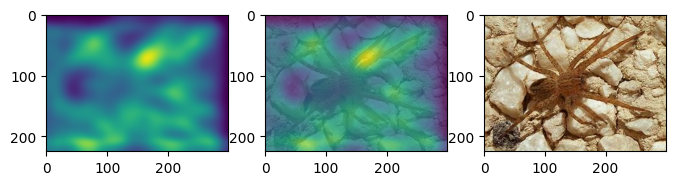

In [10]:
plt.figure(figsize=(8,8))


for idx, img_str in enumerate([raw_hm_bytes, overlaid_hm_bytes]):
    bytes_str = img_str.encode('utf-8')
    prediction_image_byte = base64.b64decode(bytes_str)
    prediction_image_arr = np.frombuffer(prediction_image_byte, dtype=np.uint8)
    prediction_image_arr = cv2.imdecode(prediction_image_arr,flags=cv2.IMREAD_COLOR)
    plt.subplot(1, 3, idx+1)
    plt.imshow(cv2.cvtColor(prediction_image_arr, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB))

plt.show()